In [1]:
from eiscirc import ImpedanceModel, ImpedanceFitter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = ImpedanceModel("R0-CPE1//R1")
model._params

{'R0': 100, 'CPE1': {'value': 1e-06, 'alpha': 0.8}, 'R1': 100}

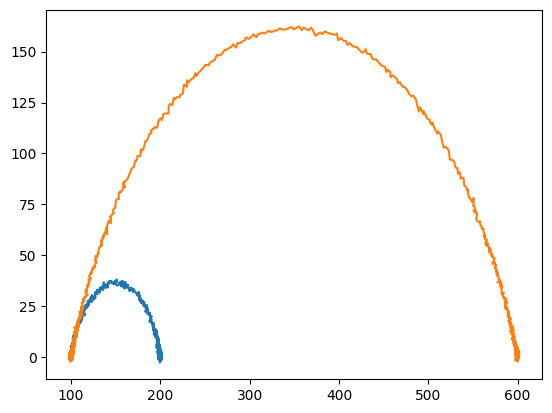

In [6]:
# Create a circuit and generate synthetic data
model = ImpedanceModel("R0-CPE1//R1")


frequencies = np.logspace(-3, 6, 1000)  # 1mHz to 1MHz
omega = 2 * np.pi * frequencies
Z_ideal = model.impedance(omega)

noise = 0.9 * np.random.normal(size=Z_ideal.shape)  # 90% noise
Z_data = Z_ideal + noise
plt.plot (Z_data[:len(omega)], -Z_data[len(omega):])

true_params = {"R0": 100,"CPE1": (1e-6, .73), "R1": 500}
model.set_params(**true_params)
Z_ideal = model.impedance(omega)

#Z_ideal = model.impedance(omega, true_params)
#Z_ideal = np.concatenate([model.Z_real, model.Z_imag])

noise = 0.9 * np.random.normal(size=Z_ideal.shape)  # 90% noise
Z_data = Z_ideal + noise
plt.plot (Z_data[:len(omega)], -Z_data[len(omega):])

(0.001, 1000000.0)
Before fit {'R0': 100, 'R1': 100, 'CPE1': {'value': 1e-06, 'alpha': 0.39}, 'R2': 100}
After fit namespace(R0=np.float64(0.34806230761785206), R1=np.float64(599.6067253323572), CPE1=namespace(value=np.float64(6.104105381864732e-07), alpha=np.float64(0.7303030680227777)), R2=np.float64(119.65142100253837))
After fit {'R0': np.float64(0.34806230761785206), 'R1': np.float64(599.6067253323572), 'CPE1': {'value': np.float64(6.104105381864732e-07), 'alpha': np.float64(0.7303030680227777)}, 'R2': np.float64(119.65142100253837)}
RMSE: 9.18e-01


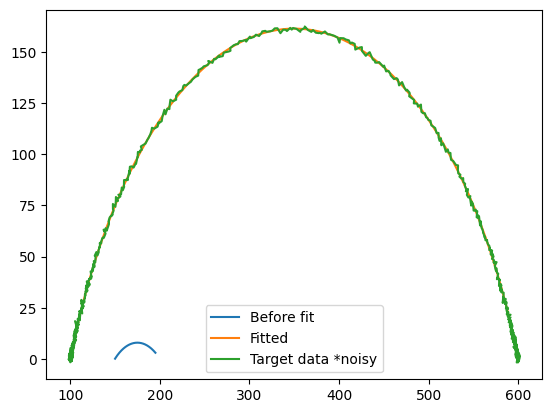

In [43]:
#model_fit = ImpedanceModel("R0-C1//R1")

#fitter = ImpedanceFitter(model_fit, frequencies, Z_data)
#fitter.set_bounds(R0=(1, 1e3))
#fitter.set_initial_guess(C1=1e-6)
#fitter.set_fixed_params(R0=100)

model_fit = ImpedanceModel("R0-R1//(CPE1-R2)")

fitter = ImpedanceFitter(model_fit, frequencies, Z_data)
fitter.set_initial_guess(CPE1_alpha=0.39)
print(fitter.bounds["R1"])

plt.plot(model_fit.Z_real, -model_fit.Z_imag, label='Before fit')

print ("Before fit", model_fit._params)

result = fitter.fit()

print ("After fit", model_fit.param_values)
print ("After fit", result.parameters)
print(f"RMSE: {result.rmse:.2e}")

plt.plot(model_fit.Z_real, -model_fit.Z_imag, label='Fitted')
plt.plot (Z_data[:len(omega)], -Z_data[len(omega):], label = "Target data *noisy")
plt.legend()